In [613]:
%pylab inline
import seaborn as sns
sns.set(palette='Set2', font_scale=1.3)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [4]:
import pickle

In [5]:
with open("../ticket_data/fines_per_day.pkl", 'rb') as file_:
    ticket_data = pickle.load(file_)

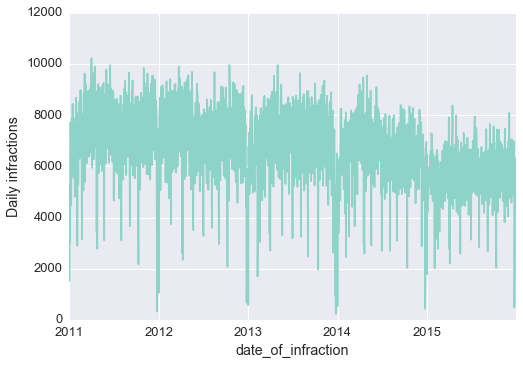

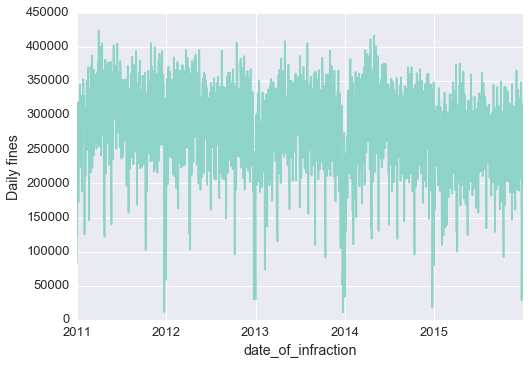

In [12]:
ticket_data.ix[:, 0].plot()
plt.ylabel("Daily infractions")
plt.figure()
ticket_data.ix[:, 1].plot()
plt.ylabel("Daily fines")

In [31]:
weather = pd.read_csv("../data/weather/2015_02.csv", skiprows=15)

In [43]:
days_of_week_d = {0: "Mon", 1: "Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}

In [45]:
ticket_data["day_of_week"] = ticket_data.index.map(lambda s: days_of_week_d[s.dayofweek])

In [343]:
days_of_week_d

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

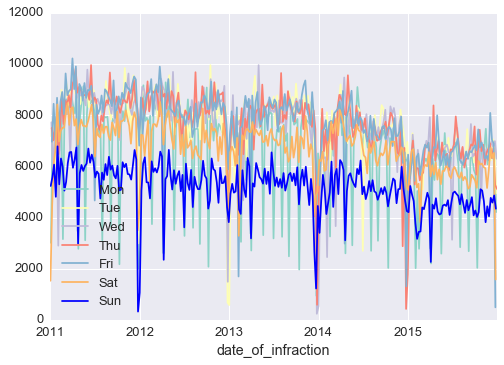

In [62]:
for day_ in days_of_week_d.values():
    if day_ != "Sun":
        ticket_data[ticket_data.day_of_week == day_].set_fine_amount["count"].plot(label=day_, legend=True)
    else:
        ticket_data[ticket_data.day_of_week == day_].set_fine_amount["count"].plot(label=day_, legend=True, c='b')

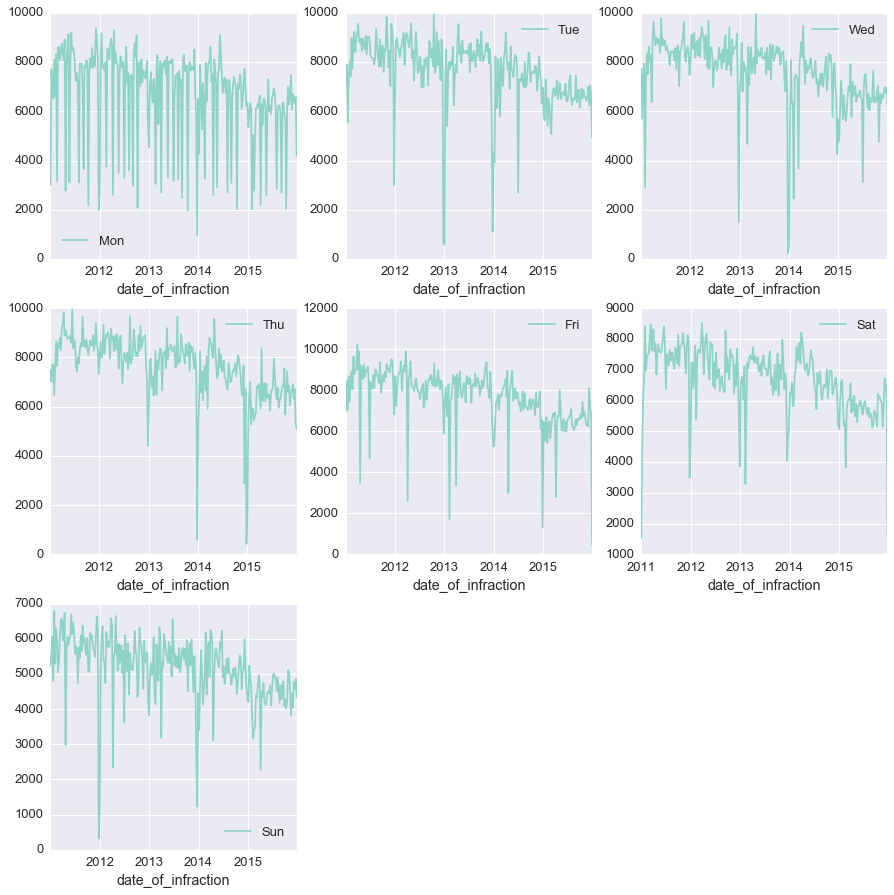

In [67]:
plt.figure(figsize=(15, 15))
for i, day_ in enumerate(days_of_week_d.values()):
    plt.subplot2grid((3,3), (i/3, i % 3))
    ticket_data[ticket_data.day_of_week == day_].set_fine_amount["count"].plot(label=day_, legend=True)

In [ ]:
with open("../ticket_data/fines_with_holidays.pkl", 'rb') as file_:
    data2 = pickle.load(file_)

In [104]:
data2_nohol = data2[data2.is_holiday == False]

In [144]:
# data2_nohol = data2[["count", "date", "is_holiday", "day_of_week"]]
data2_nohol = data2[["count", "date", "is_holiday", "day_of_week"]]
data2_nohol = data2_nohol[data2_nohol.is_holiday == False]

In [149]:
data2_nohol.day_of_week.value_counts().index.values.tolist()

['Sat', 'Thr', 'Sun', 'Tue', 'Wed', 'Fri', 'Mon']

In [142]:
df_day = data2_nohol[data2_nohol.day_of_week == day_]

In [152]:
list_of_days= data2_nohol.day_of_week.value_counts().index.tolist()

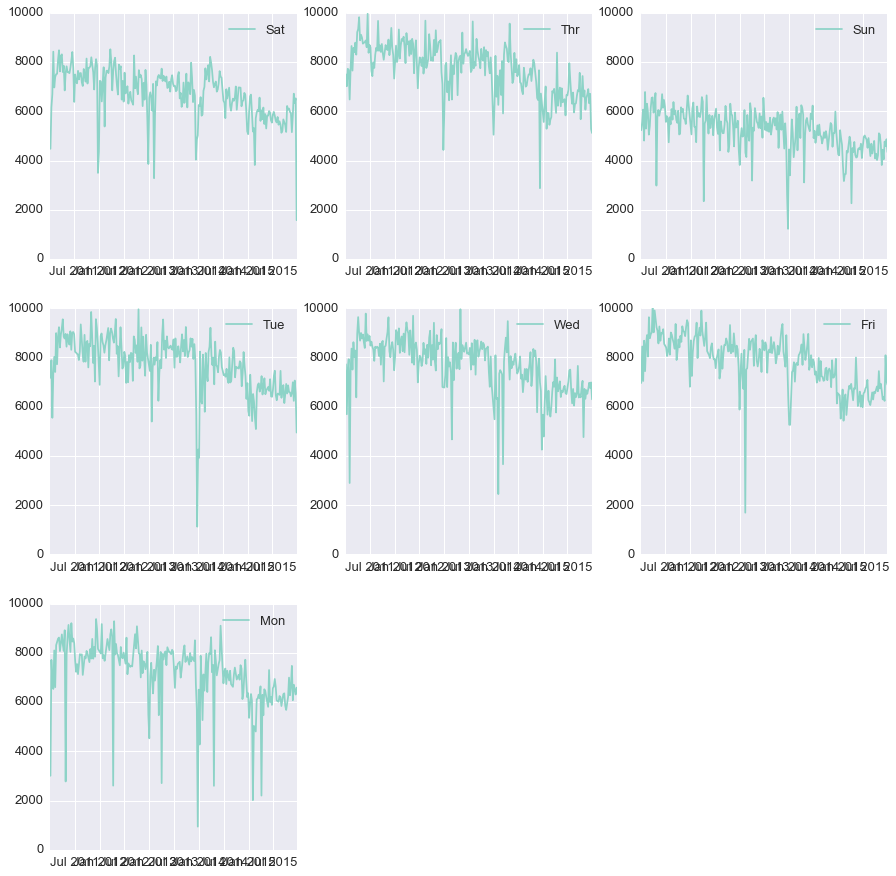

In [165]:
plt.figure(figsize=(15, 15))
for i, day_ in enumerate(list_of_days):
#     print i
    plt.subplot2grid((3,3), (i/3, i % 3))
    df_day = data2_nohol[data2_nohol.day_of_week == day_]
    plt.plot(df_day.date.values, df_day["count"].values, label=day_)
    plt.ylim(0, 10000)
    plt.legend()
#     df_day.plot(x='date', y='count', label=day_, legend=True)


# We now add weather data to the predictors for each day infrances
The weather features are: Temperature (mean, min, max), total precipitation and snow on the ground.

In [454]:
# prepare weather df
weather_11 = pd.read_csv("../data/weather/eng-daily-01012011-12312011.csv", skiprows=24)
weather_12 = pd.read_csv("../data/weather/eng-daily-01012012-12312012.csv", skiprows=24)
weather_13 = pd.read_csv("../data/weather/eng-daily-01012013-12312013.csv", skiprows=24)
weather_14 = pd.read_csv("../data/weather/eng-daily-01012014-12312014.csv", skiprows=24)
weather_15 = pd.read_csv("../data/weather/eng-daily-01012015-12312015.csv", skiprows=24)
weather_df = pd.concat([weather_11, weather_12, weather_13, weather_14, weather_15])
weather_df["date"] = weather_df["Date/Time"]
weather_df.rename(columns={'Max Temp (\xc2\xb0C)': 'MaxTemp', 'Min Temp (\xc2\xb0C)': 'MinTemp', 'Mean Temp (\xc2\xb0C)': "MeanTemp", 'Total Precip (mm)':"TotalPrecip", 'Snow on Grnd (cm)': "Snow"}, inplace=True)
weather_df = weather_df[['date', 'MaxTemp', 'MinTemp', 'MeanTemp', 'TotalPrecip', 'Snow' ]]
weather_df["date"] = pd.to_datetime(weather_df["date"], format="%Y-%m-%d")
weather_df["month"] = weather_df["date"].map(lambda s: s.month)
days_dict={5:'Sat', 3:'Thr', 6:'Sun', 1:'Tue', 2:'Wed', 4:'Fri', 0:'Mon'}
weather_df["dow"] = weather_df["date"].map(lambda s: days_dict[s.dayofweek])
weather_df.Snow = weather_df.Snow.fillna(-1)

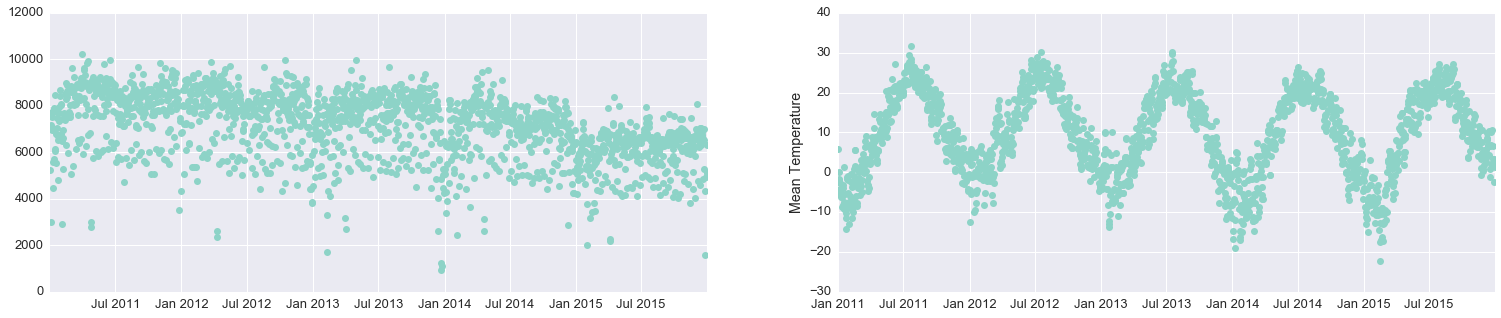

In [460]:
plt.figure(figsize=(40, 1*5))
# d_fines_r = d_fines[(d_fines.month.isin(range(1,13))) & (d_fines.day_of_week.isin(["Tue", "Wed", "Thr", "Fri"]))]
# d_weath_r = weather_df[(weather_df.month.isin(range(1,13))) & (weather_df.dow.isin(["Tue", "Wed", "Thr", "Fri"]))]
d_fines_r = d_fines[d_fines.is_holiday == False]
d_weath_r = weather_df
plt.subplot2grid((1,dd), (0,0))
plt.plot(d_fines_r.date, d_fines_r["count"], 'o')
plt.subplot2grid((1,dd), (0,1))
plt.plot(d_weath_r.date, d_weath_r.MeanTemp, 'o')
plt.ylabel("Mean Temperature")

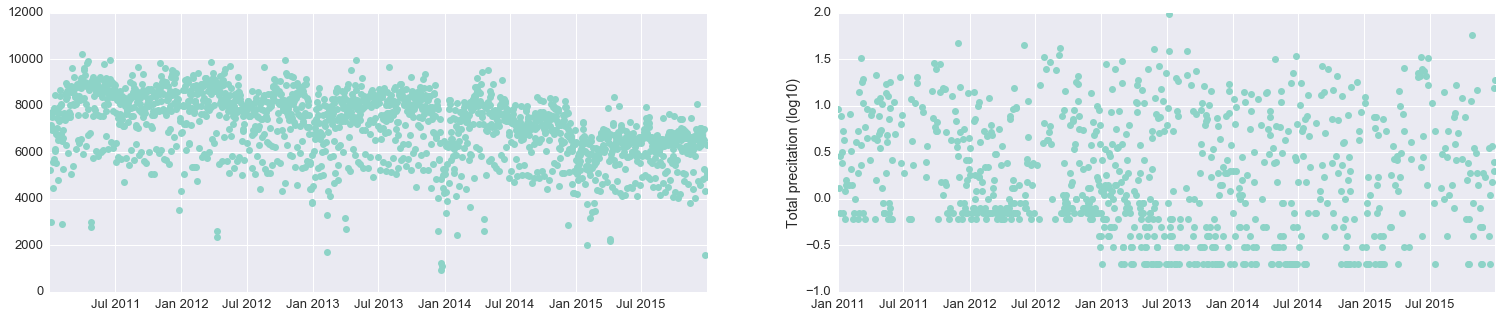

In [463]:
plt.figure(figsize=(40, 1*5))
plt.subplot2grid((1,dd), (0,0))
plt.plot(d_fines_r.date, d_fines_r["count"], 'o')
plt.subplot2grid((1,dd), (0,1))
plt.plot(d_weath_r.date, np.log10(d_weath_r.TotalPrecip), 'o')
plt.ylabel("Total precitation (log10)")

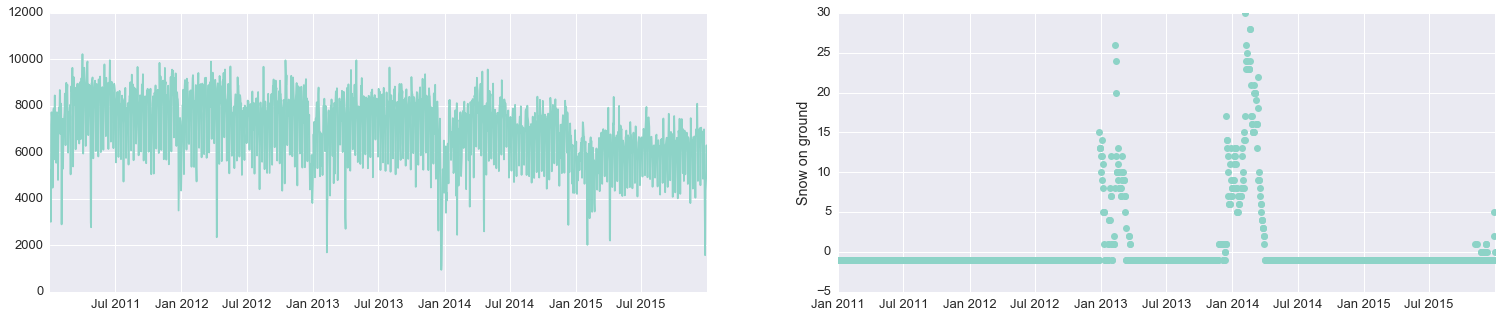

In [462]:
plt.figure(figsize=(40, 1*5))
plt.subplot2grid((1,dd), (0,0))
plt.plot(d_fines_r.date, d_fines_r["count"], '-')
plt.subplot2grid((1,dd), (0,1))
plt.plot(d_weath_r.date, d_weath_r.Snow, 'o')
plt.ylabel("Snow on ground")

In [464]:
with open("../notebooks/fines_all_models.pkl", 'rb') as file_:
    fines_all_data = pickle.load(file_)

In [471]:
with open("../notebooks/fines_with_holidays.pkl", 'rb') as file_:
    fines_with_holidays = pickle.load(file_)

In [505]:
dict_is_hol = {True: 1, False:0}
fines_all_data.is_holiday = fines_all_data.is_holiday.map(lambda s: dict_is_hol[s]) 
fines_all_data["day_of_week_n"] = fines_all_data.date.map(lambda s: int(s.dayofweek) )

In [629]:
data_train_nw = fines_all_data[["day_of_week_n", "is_holiday",  "x", "holiday residual"]][fines_all_data.date.map(lambda s: s.year <=2013)]
import sklearn.preprocessing
enc = sklearn.preprocessing.OneHotEncoder(categorical_features=[0])
enc.fit(data_train_nw.values)
data_train_nw = enc.transform(data_train_nw.values).toarray()

data_val_nw = fines_all_data[["day_of_week_n", "is_holiday",  "x", "holiday residual"]][fines_all_data.date.map(lambda s: s.year ==2014)]
import sklearn.preprocessing
enc = sklearn.preprocessing.OneHotEncoder(categorical_features=[0])
enc.fit(data_val_nw.values)
data_val_nw = enc.transform(data_val_nw.values).toarray()

In [630]:
data_fines_weather = fines_all_data.merge(weather_df,on="date")
data_train_w = data_fines_weather[["day_of_week_n", "is_holiday",  "x", 'MaxTemp', 'MinTemp', 'MeanTemp', 'TotalPrecip', 'Snow', "holiday residual"]][data_fines_weather.date.map(lambda s: s.year <=2013)].fillna(-1)
import sklearn.preprocessing
enc = sklearn.preprocessing.OneHotEncoder(categorical_features=[0])
enc.fit(data_train_w.values)
data_train_w = enc.transform(data_train_w.values).toarray()

data_val_w = data_fines_weather[["day_of_week_n", "is_holiday",  "x", 'MaxTemp', 'MinTemp', 'MeanTemp', 'TotalPrecip', 'Snow', "holiday residual"]][data_fines_weather.date.map(lambda s: s.year ==2014)].fillna(-1)
import sklearn.preprocessing
enc = sklearn.preprocessing.OneHotEncoder(categorical_features=[0])
enc.fit(data_val_w.values)
data_val_w = enc.transform(data_val_w.values).toarray()

In [631]:
from sklearn.ensemble import RandomForestRegressor

In [632]:
for n_ in [1,2,3,4,5,6,7, 8]:
    reg = RandomForestRegressor(n_estimators=200, max_features=n_)
    reg.fit(data_train_nw[:, :-1], data_train_nw[:, -1])
    print "n={}".format(n_), reg.score(data_val_nw[:, :-1], data_val_nw[:, -1])

n=1 -4.97794337674
n=2 -5.3898626435
n=3 -4.8887326472
n=4 -4.91488618805
n=5 -4.58386586062
n=6 -4.36140734935
n=7 -4.17229181822
n=8 -4.90234830355


In [635]:
for n_ in [1,2,4,6,8,10, 12]:
    reg = RandomForestRegressor(n_estimators=500, max_features=n_, min_samples_leaf=1)
    reg.fit(data_train_w[:, :-1], data_train_w[:, -1])
    print "n={}".format(n_), reg.score(data_val_w[:, :-1], data_val_w[:, -1])

n=1 -0.449386984902
n=2 -0.856729211897
n=4 -1.24468765507
n=6 -2.04127864616
n=8 -2.1637943735
n=10 -2.92246096486
n=12 -3.67279211808


$R^2$ between predicted output and actual output is negative for different hyperparameter value of the random forest. This shows the weather data is not predictive of the infrances fluctuations.

In [537]:
reg.feature_importances_

array([ 0.01860577,  0.01855942,  0.01271904,  0.00619768,  0.01596639,
        0.00773774,  0.02642737,  0.05883128,  0.83495531])

In [521]:
data_train_nw

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.00000000e+00,  -2.63373654e-01,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,  -8.88875200e-02,   1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,  -6.20258054e-01,   2.00000000e+00],
       ..., 
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,  -2.91147633e-01,   1.82300000e+03],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,  -8.30519258e-02,   1.82400000e+03],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,  -2.38045594e-01,   1.82500000e+03]])

In [ ]:
data_train_nw = fines_all_data[["day_of_week_n", "is_holiday", "holiday residual", "x"]]
import sklearn.preprocessing
enc = sklearn.preprocessing.OneHotEncoder(categorical_features=[0])
enc.fit(data_train_nw.values)
data_train_nw = enc.transform(data_train_nw.values).toarray()

In [616]:
# Linear model
data_train_linear = fines_all_data[["day_of_week_n", "is_holiday",  "x", "count"]][fines_all_data.date.map(lambda s: s.year <=2014)]
import sklearn.preprocessing
enc = sklearn.preprocessing.OneHotEncoder(categorical_features=[0])
enc.fit(data_train_linear.values)
data_train_linear = enc.transform(data_train_linear.values).toarray()

In [604]:
from sklearn.linear_model import LinearRegression

In [609]:
data_train_linear[:, -1]

array([ 1527.,  5233.,  3009., ...,  4450.,  6505.,  4260.])

In [617]:
l_reg = LinearRegression()
l_reg.fit(data_train_linear[:, :-1], data_train_linear[:, -1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [615]:
fines_all_data

,count,sum,date,day_of_week,is_holiday,x,residuals,linear model,holiday model,residual model,holiday residual,gaussian,noise model,day_of_week_n
0,1527,83570,2011-01-01,Sat,1,0.0,-0.792824,7370.539166,2072.964140,-0.718750,-0.263374,0.064761,2207.211503,5
1,5233,218885,2011-01-02,Sun,0,1.0,-0.088888,5743.527956,5743.527956,0.000000,-0.088888,-0.028144,5581.884201,6
2,3009,121630,2011-01-03,Mon,0,2.0,-0.593557,7403.260287,7923.802026,0.070312,-0.620258,0.086850,8611.987114,0
3,7177,287470,2011-01-04,Tue,0,3.0,-0.160968,8553.909911,8553.909911,0.000000,-0.160968,0.214923,10392.341306,1
4,7722,318960,2011-01-05,Wed,0,4.0,-0.099324,8573.560219,8640.541158,0.007812,-0.106306,-0.042173,8276.140880,2
5,7499,305850,2011-01-06,Thr,0,5.0,-0.145056,8771.338563,8771.338563,0.000000,-0.145056,-0.042171,8401.443194,3
6,6965,279875,2011-01-07,Fri,0,6.0,-0.201481,8722.401868,8790.545632,0.007812,-0.207671,0.223143,10752.095666,4
7,4477,172485,2011-01-08,Sat,0,7.0,-0.392272,7366.788536,7251.682466,-0.015625,-0.382626,0.104371,8008.545043,5
8,5572,214355,2011-01-09,Sun,0,8.0,-0.029228,5739.761240,5739.761240,0.000000,-0.029228,-0.076604,5300.075413,6
9,7713,314750,2011-01-10,Mon,0,9.0,0.042438,7398.998997,7919.241114,0.070312,-0.026043,0.071469,8485.220153,0


(1, 120)

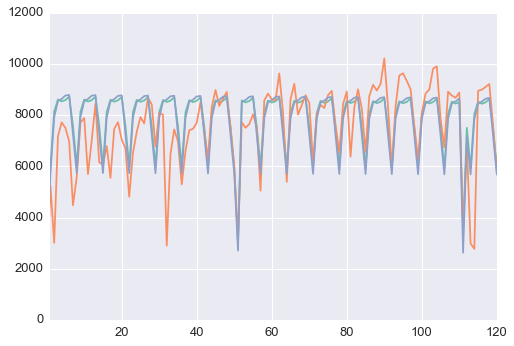

In [621]:
plt.plot(data_train_linear[:, -2], l_reg.predict(data_train_linear[:, :-1]))
plt.plot(data_train_linear[:, -2], data_train_linear[:, -1])
plt.plot(data_train_linear[:, -2], fines_all_data["holiday model"][fines_all_data.date.map(lambda s: s.year) <=2014])
plt.xlim(1, 120)

In [624]:
l_reg.coef_

array([  1.07117299e+02,   5.83564099e+02,   5.05804644e+02,
         5.61524021e+02,   6.95838842e+02,  -4.37483995e+02,
        -2.01636491e+03,  -5.11920489e+03,  -8.15688718e-01])